Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data_AUG = pd.read_csv("apartments_pl_2023_08.csv")
data_SEP = pd.read_csv("apartments_pl_2023_09.csv")
data_OCT = pd.read_csv("apartments_pl_2023_10.csv")

In [3]:
data_AUG.drop(columns=["id"], inplace=True)
data_AUG.drop(columns=["schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance"], inplace=True)
data_AUG.drop(columns=["buildingMaterial","condition", "type"], inplace=True)

data_SEP.drop(columns=["id"], inplace=True)
data_SEP.drop(columns=["schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance"], inplace=True)
data_SEP.drop(columns=["buildingMaterial","condition", "type"], inplace=True)

data_OCT.drop(columns=["id"], inplace=True)
data_OCT.drop(columns=["schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance"], inplace=True)
data_OCT.drop(columns=["buildingMaterial","condition", "type"], inplace=True)


data_SEP.drop_duplicates(inplace = True)
data_AUG.drop_duplicates(inplace = True)
data_OCT.drop_duplicates(inplace = True)

Na podstawie wcześniejszej analizy usuwamy kolumny: "schoolDistance","clinicDistance","postOfficeDistance","kindergartenDistance","restaurantDistance","collegeDistance","pharmacyDistance", gdyż są one silnie ze sobą skorelowane, a w danych występuje dodatkowa zależna od nich kolumna "poiCount". Usuwamy również kolumnę "id" zawierającą unikatowy identyfikator wiersza, oraz ze względu na wysoki procent braków w rekordach kolumny "buildingMaterial", "condition" oraz "type".

In [4]:
missing_values = pd.concat([
        data_AUG.isna().sum(),
        data_AUG.isna().sum() / len(data_AUG) * 100,
        data_SEP.isna().sum(),
        data_SEP.isna().sum() / len(data_SEP) * 100,
        data_OCT.isna().sum(),
        data_OCT.isna().sum() / len(data_OCT) * 100
    ],
    axis=1
)
missing_values.rename(columns = {0:'AUG', 1:'AUG %',2:'SEP', 3:'SEP %',4:'OCT', 5:'OCT %',6:'ALL', 7:'ALL %'}, inplace = True)
missing_values

,AUG,AUG %,SEP,SEP %,OCT,OCT %
city,0,0.00,0,0.00,0,0.00
squareMeters,0,0.00,0,0.00,0,0.00
rooms,0,0.00,0,0.00,0,0.00
floor,3391,18.16,3000,17.86,3012,18.25
floorCount,259,1.39,243,1.45,242,1.47
buildYear,3220,17.24,2903,17.29,2878,17.43
latitude,0,0.00,0,0.00,0,0.00
longitude,0,0.00,0,0.00,0,0.00
centreDistance,0,0.00,0,0.00,0,0.00
poiCount,0,0.00,0,0.00,0,0.00


<Axes: >

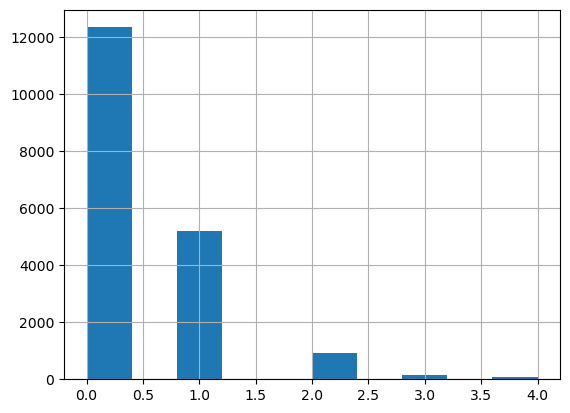

In [5]:
data_AUG.isna().sum(1).hist()

<Axes: >

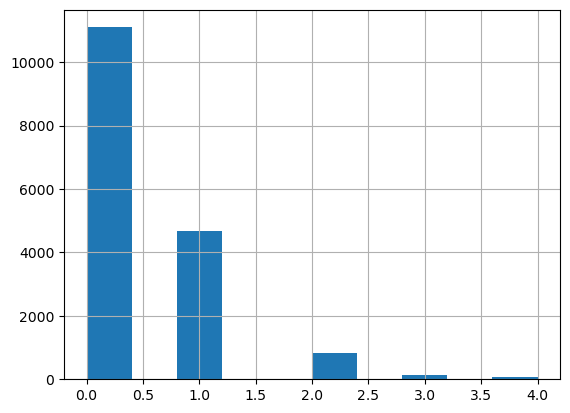

In [6]:
data_SEP.isna().sum(1).hist()

<Axes: >

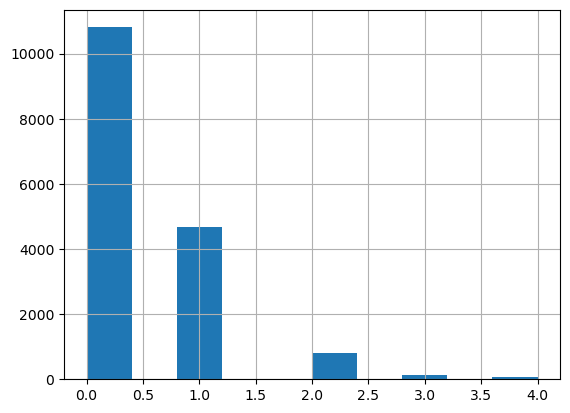

In [7]:
data_OCT.isna().sum(1).hist()

In [8]:
data_AUG = data_AUG.loc[(data_AUG.isna().sum(axis=1)<3)]
data_SEP = data_SEP.loc[(data_SEP.isna().sum(axis=1)<3)]
data_OCT = data_OCT.loc[(data_OCT.isna().sum(axis=1)<3)]

Ze względu na niski odsetek rekordów posiadajacych więcej, niż dwa braki, oferty takie zostały usunięte, celem łatwiejszej obsługi braków w ofertach.

In [9]:
def show_missing_values(data):
    missing_values = pd.concat([
        data.isna().sum(),
        data.isna().sum() / len(data) * 100
    ],axis=1)
    missing_values.rename(columns = {0:'MISSING', 1:'MISSING %'}, inplace = True)
    print(missing_values)

In [10]:
missing_values = pd.concat([
        data_AUG.isna().sum(),
        data_AUG.isna().sum() / len(data_AUG) * 100,
        data_SEP.isna().sum(),
        data_SEP.isna().sum() / len(data_SEP) * 100,
        data_OCT.isna().sum(),
        data_OCT.isna().sum() / len(data_OCT) * 100
    ],
    axis=1
)
missing_values.rename(columns = {0:'AUG', 1:'AUG %',2:'SEP', 3:'SEP %',4:'OCT', 5:'OCT %',6:'ALL', 7:'ALL %'}, inplace = True)
missing_values

,AUG,AUG %,SEP,SEP %,OCT,OCT %
city,0,0.00,0,0.00,0,0.00
squareMeters,0,0.00,0,0.00,0,0.00
rooms,0,0.00,0,0.00,0,0.00
floor,3160,17.13,2787,16.81,2793,17.15
floorCount,70,0.38,67,0.40,67,0.41
buildYear,3038,16.47,2738,16.51,2708,16.62
latitude,0,0.00,0,0.00,0,0.00
longitude,0,0.00,0,0.00,0,0.00
centreDistance,0,0.00,0,0.00,0,0.00
poiCount,0,0.00,0,0.00,0,0.00


In [11]:
import missingno as msno

<Axes: >

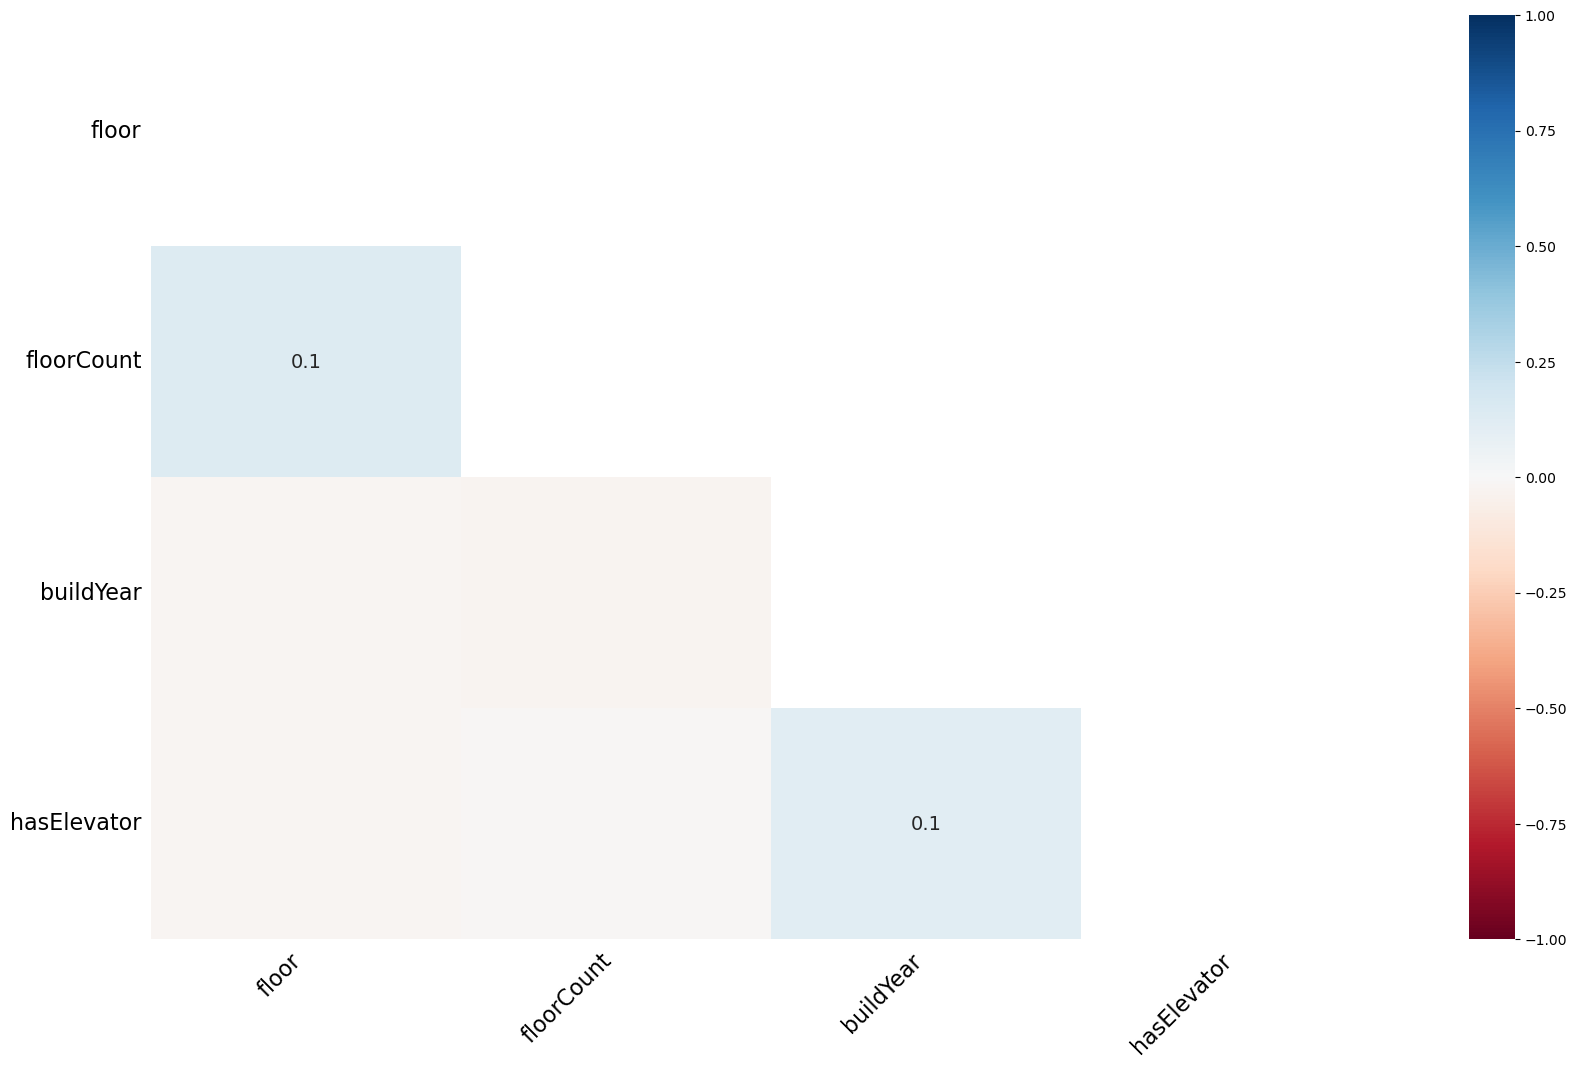

In [12]:
msno.heatmap(data_AUG)

<Axes: >

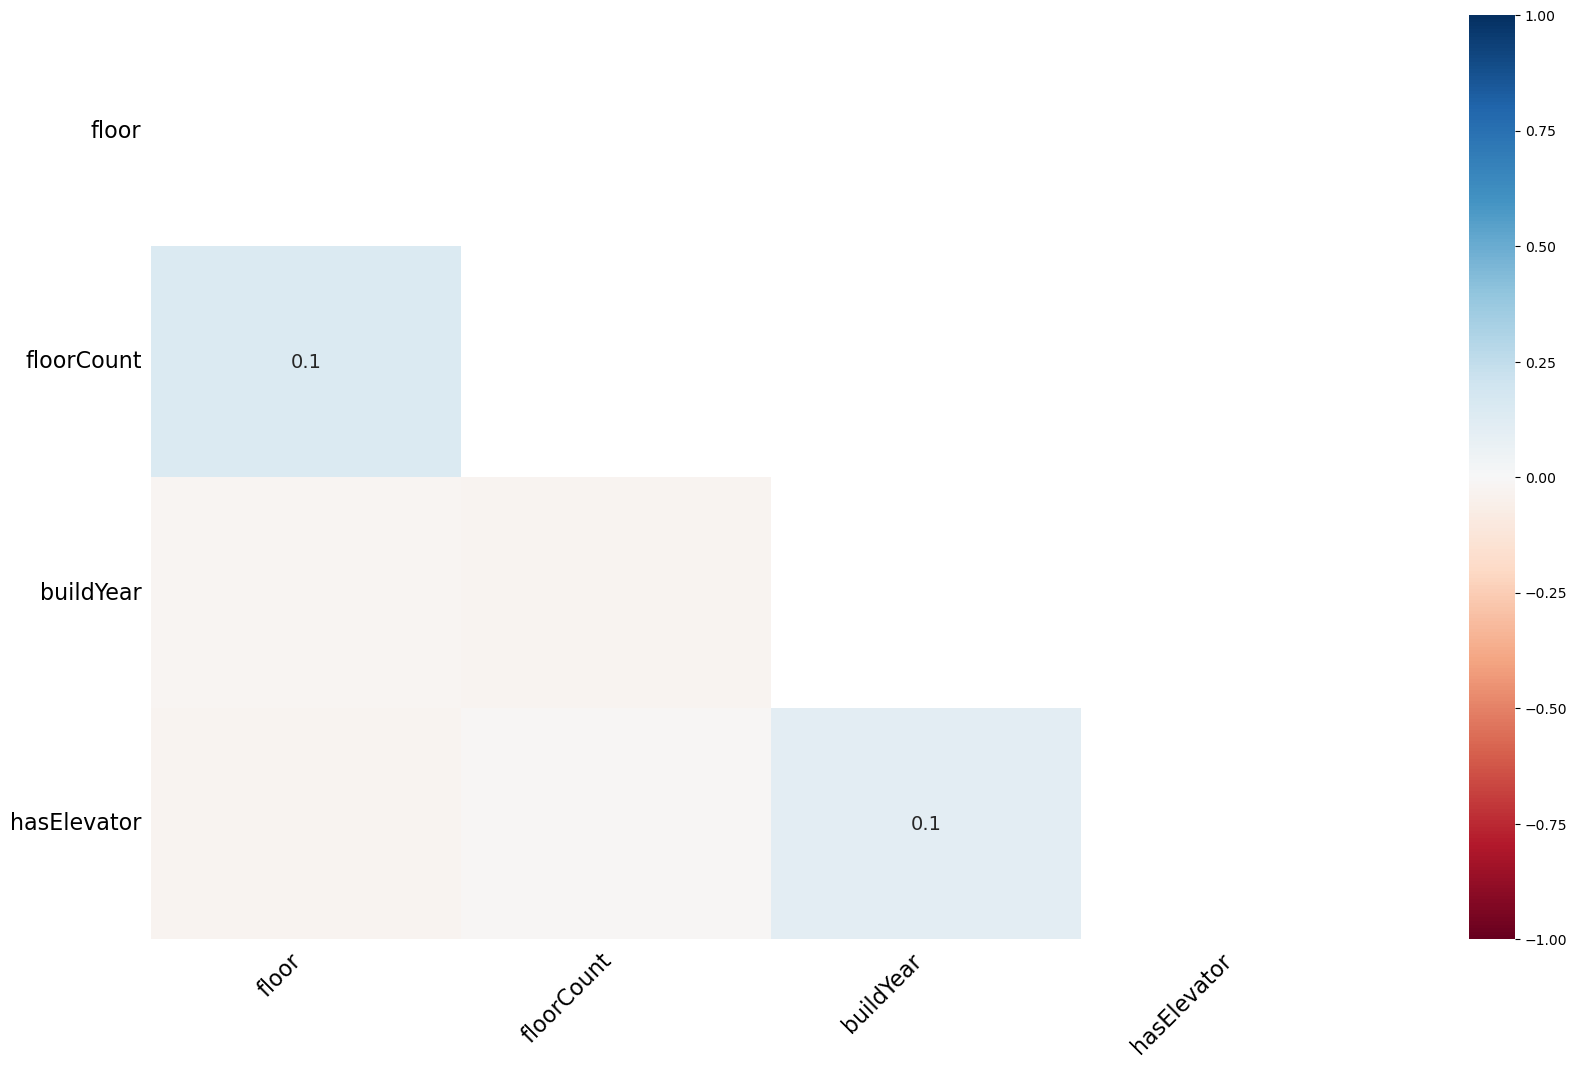

In [13]:
msno.heatmap(data_SEP)

<Axes: >

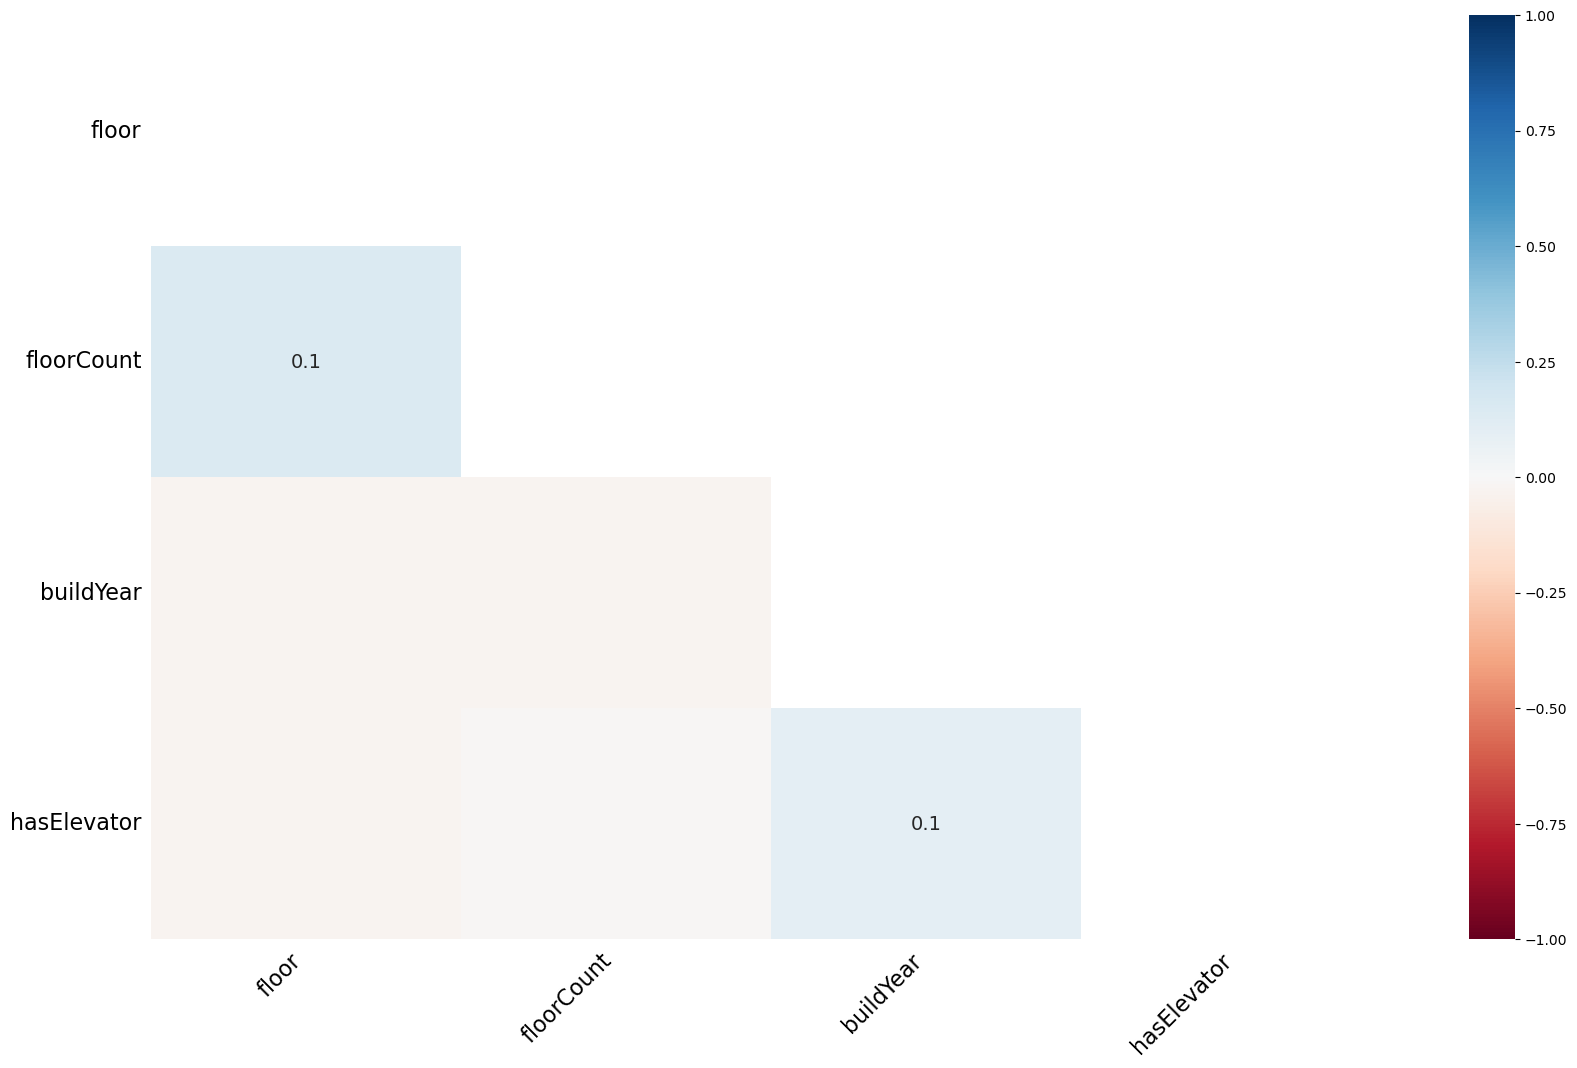

In [14]:
msno.heatmap(data_OCT)

Powyższe wykresy wskazują na to, że nie występuje korelacja pomiędzy brakującymi danymi w poszczególnych miesiąca, co może oznaczać, że mamy do czynienia z brakami "Missing at Random".

## Przypisanie miesiąca do poszczególnych ofert na podstawie pliku, z którego pochodzą dane

In [15]:
# dodanie miesiąca, w którym dana oferta sprzedaży była dostępna (wszystkie dane pochodzą z roku 2023)
data_AUG["offerMonth"] = 8
data_SEP["offerMonth"] = 9
data_OCT["offerMonth"] = 10

Do każdej oferty dodajemy informację o miesiącu, z którego pochodzi, co po złączeniu plików da nam informację o trendach zmian cen w danym przedziale czasu.

# Obsługa brakujących danych

In [16]:
# TODO Wypełnienie braków (type, buildYear, floor, floorCount, hasElevator)
# type, buildYear - raczej trudno uzupełnić, niska korelacja z ceną, usunąć kolumnę(?)
# floorCount -> usunąć wiersze (?) to tylko kilkadziesiąt ofert, 
# hasElevator można ustawić na podstawie floorCount, powinno być dość zgodnie z rzeczywistością,
# floor (?) może usunąć kolumnę, niemal zerowa korelacja z ceną, a i tak mamy sporo innych zmiennych

W przypadku brakujących danych, które zostaną uzupełnione wartościami średnimi lub medianą, operacje zostaną wykonane oddzielnie w obrębie poszczególnych miesięcy, aby uzupełnione oferty, były bardziej zbliżone do innych ofert wystawionych w podobnym czasie.

Uzupełnienie danych w kolumnach, w których wartości zostaną uzupełnione na podstawie innych kolumn/wiedzy dziedzinowej zostanie wykonane po wcześniejszym połączeniu danych w jeden DataFrame.

## buildYear, floorCount, floor

Braki w tych trzech zmiennych są uzupełniane medianą.

In [17]:
data_AUG.fillna(data_AUG.median(numeric_only=True), inplace=True)
data_SEP.fillna(data_SEP.median(numeric_only=True), inplace=True)
data_OCT.fillna(data_OCT.median(numeric_only=True), inplace=True)

In [18]:
# TODO obsługa odchyłek (outliers)
# z wykresów z analizy wygląda, że warto rozpatrzyć tutaj zmienne: 
# "floor", "buildYear", "poiCount"

In [19]:
# TODO przystosowanie istniejących kolumn (np. one-hot encoding dla danych dyskretnych,. normalizacja danych ciągłych)

## Złączenie danych

In [20]:
data_ALL = pd.concat([data_AUG, data_SEP, data_OCT], ignore_index=True)

In [21]:
data_ALL.tail()

,city,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,offerMonth
51310,bydgoszcz,50.12,2.00,1.00,1.00,1992.00,53.13,18.00,0.88,42.00,condominium,yes,no,no,no,no,360000,10
51311,bydgoszcz,100.00,4.00,3.00,4.00,1910.00,53.13,18.01,0.65,54.00,condominium,yes,yes,no,no,yes,590000,10
51312,bydgoszcz,59.10,2.00,1.00,1.00,1910.00,53.13,18.01,0.65,54.00,condominium,yes,no,no,no,yes,320000,10
51313,bydgoszcz,81.07,5.00,1.00,4.00,2019.00,53.12,17.96,3.04,9.00,condominium,no,yes,yes,no,no,679000,10
51314,bydgoszcz,133.16,4.00,3.00,3.00,1992.00,53.11,17.99,1.32,9.00,condominium,no,yes,no,no,yes,925000,10


In [22]:
data_ALL.count()

city               51315
squareMeters       51315
rooms              51315
floor              51315
floorCount         51315
buildYear          51315
latitude           51315
longitude          51315
centreDistance     51315
poiCount           51315
ownership          51315
hasParkingSpace    51315
hasBalcony         51315
hasElevator        49134
hasSecurity        51315
hasStorageRoom     51315
price              51315
offerMonth         51315
dtype: int64

## hasElevator

https://isap.sejm.gov.pl/isap.nsf/download.xsp/WDU20190001065/O/D20191065.pdf
**Dział III Rozdział 1 Paragraf 54**

In [23]:
print("hasElevator NA ALL:" + str(data_ALL["hasElevator"].isna().sum()))

hasElevator NA ALL:2181


Budynki mieszkalne mające więcej niż 4 piętra wymagają windy

In [24]:
filt = (data_ALL["floorCount"] > 4)
new_val = data_ALL.loc[filt, ["hasElevator"]].fillna("yes", axis=1)
data_ALL.loc[filt, ["hasElevator"]] = new_val

W budynkach mających 4 lub mniej pięter parametr określający obecność windy ustawiany jest na wartość: "nie"

In [25]:
filt = ((data_ALL["floorCount"] <= 4) & (data_ALL["floorCount"].notnull()))
new_val = data_ALL.loc[filt, ["hasElevator"]].fillna("no", axis=1)
data_ALL.loc[filt, ["hasElevator"]] = new_val

In [26]:
print("hasElevator NA ALL:" + str(data_ALL["hasElevator"].isna().sum()))

hasElevator NA ALL:0


## Ownership

### Wartość odstająca

In [27]:
data_ALL[data_ALL["ownership"] == "udział"]

,city,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,offerMonth
36216,krakow,42.00,2.00,2.00,3.00,1920.00,50.05,19.95,1.11,59.00,udział,no,yes,no,no,no,745000,10


In [28]:
data_ALL.drop(data_ALL[data_ALL["ownership"] == "udział"].index, inplace=True)

Występuje tylko 1 rekord z wartością ownership="udział" z tego powodu zostaje usunięty.

### One-hot encoding

In [29]:
data_ALL = pd.get_dummies(data_ALL, columns=["ownership"], prefix="ownership")

Ownership jest zmienną tekstową, dlatego zostaje zakodowana metodą one-hot.

## City - one-hot encoding

"city" jest zmienną teskstową kategoryczną o liczności 15. Z tego powodu zostanie zakodowana metodą one-hot.

In [30]:
data_ALL = pd.get_dummies(data_ALL, columns=["city"], prefix="city")
data_ALL

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,63.00,3.00,4.00,10.00,1980.00,53.38,14.63,6.53,9.00,yes,...,0,0,0,0,0,0,0,1,0,0
1,36.00,2.00,8.00,10.00,1990.00,53.44,14.56,2.15,16.00,no,...,0,0,0,0,0,0,0,1,0,0
2,73.02,3.00,2.00,3.00,1990.00,53.45,14.55,3.24,9.00,no,...,0,0,0,0,0,0,0,1,0,0
3,87.60,3.00,2.00,3.00,1990.00,53.44,14.53,2.27,32.00,yes,...,0,0,0,0,0,0,0,1,0,0
4,66.00,3.00,1.00,3.00,1990.00,53.41,14.50,4.07,1.00,no,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51310,50.12,2.00,1.00,1.00,1992.00,53.13,18.00,0.88,42.00,yes,...,0,0,0,0,0,0,0,0,0,0
51311,100.00,4.00,3.00,4.00,1910.00,53.13,18.01,0.65,54.00,yes,...,0,0,0,0,0,0,0,0,0,0
51312,59.10,2.00,1.00,1.00,1910.00,53.13,18.01,0.65,54.00,yes,...,0,0,0,0,0,0,0,0,0,0
51313,81.07,5.00,1.00,4.00,2019.00,53.12,17.96,3.04,9.00,no,...,0,0,0,0,0,0,0,0,0,0


## Konwersja zmiennych 2-wartościowych na typ boolean

In [31]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51314 entries, 0 to 51314
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           51314 non-null  float64
 1   rooms                  51314 non-null  float64
 2   floor                  51314 non-null  float64
 3   floorCount             51314 non-null  float64
 4   buildYear              51314 non-null  float64
 5   latitude               51314 non-null  float64
 6   longitude              51314 non-null  float64
 7   centreDistance         51314 non-null  float64
 8   poiCount               51314 non-null  float64
 9   hasParkingSpace        51314 non-null  object 
 10  hasBalcony             51314 non-null  object 
 11  hasElevator            51314 non-null  object 
 12  hasSecurity            51314 non-null  object 
 13  hasStorageRoom         51314 non-null  object 
 14  price                  51314 non-null  int64  
 15  of

In [32]:
columns_to_convert = ["hasParkingSpace", "hasBalcony", "hasElevator", "hasSecurity", "hasStorageRoom"]

In [33]:
for i in columns_to_convert:
    data_ALL[i] = data_ALL[i].map({'yes': 1, 'no': 0})

In [34]:
data_ALL[columns_to_convert]

,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,1,1,1,0,1
1,0,1,1,0,1
2,0,0,0,0,0
3,1,1,0,0,1
4,0,0,0,0,0
...,...,...,...,...,...
51310,1,0,0,0,0
51311,1,1,0,0,1
51312,1,0,0,0,1
51313,0,1,1,0,0


In [35]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51314 entries, 0 to 51314
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           51314 non-null  float64
 1   rooms                  51314 non-null  float64
 2   floor                  51314 non-null  float64
 3   floorCount             51314 non-null  float64
 4   buildYear              51314 non-null  float64
 5   latitude               51314 non-null  float64
 6   longitude              51314 non-null  float64
 7   centreDistance         51314 non-null  float64
 8   poiCount               51314 non-null  float64
 9   hasParkingSpace        51314 non-null  int64  
 10  hasBalcony             51314 non-null  int64  
 11  hasElevator            51314 non-null  int64  
 12  hasSecurity            51314 non-null  int64  
 13  hasStorageRoom         51314 non-null  int64  
 14  price                  51314 non-null  int64  
 15  of